In [6]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv('../Desktop/ebola.csv')
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
pd.set_option('display.max_columns', None)
# Drop the null rows
df = df.dropna()
df.head(100)

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
0,Guinea,2014,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430
1,Nigeria,2014,3.0,1.0,15.0,19.0,0.0,1.0,6.0,7
2,Sierra Leone,2014,54.0,37.0,935.0,1026.0,8.0,34.0,380.0,422
3,Liberia,2014,382.0,674.0,322.0,1378.0,168.0,301.0,225.0,694
4,Sierra Leone,2014,78.0,37.0,1146.0,1261.0,11.0,37.0,443.0,491
...,...,...,...,...,...,...,...,...,...,...
118,Nigeria,2014,0.0,1.0,19.0,20.0,0.0,1.0,7.0,8
119,Senegal,2014,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
120,Sierra Leone,2014,623.0,79.0,4057.0,4759.0,35.0,142.0,893.0,1070
121,Nigeria,2014,0.0,1.0,19.0,20.0,0.0,1.0,7.0,8


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 2484
Data columns (total 10 columns):
Country                                            1308 non-null object
Date                                               1308 non-null int64
No. of suspected cases                             1308 non-null float64
No. of probable cases                              1308 non-null float64
No. of confirmed cases                             1308 non-null float64
No. of confirmed, probable and suspected cases     1308 non-null float64
No. of suspected deaths                            1308 non-null float64
No. of probable deaths                             1308 non-null float64
No. of confirmed deaths                            1308 non-null float64
No. of confirmed, probable and suspected deaths    1308 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 112.4+ KB


In [9]:
selected_features = df[['Country', 'Date', 'No. of suspected cases', 'No. of probable cases', 'No. of confirmed cases','No. of confirmed, probable and suspected cases', 'No. of suspected deaths','No. of probable deaths', 'No. of confirmed deaths', 'No. of confirmed, probable and suspected deaths']]
selected_features.head(20)

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
0,Guinea,2014,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430
1,Nigeria,2014,3.0,1.0,15.0,19.0,0.0,1.0,6.0,7
2,Sierra Leone,2014,54.0,37.0,935.0,1026.0,8.0,34.0,380.0,422
3,Liberia,2014,382.0,674.0,322.0,1378.0,168.0,301.0,225.0,694
4,Sierra Leone,2014,78.0,37.0,1146.0,1261.0,11.0,37.0,443.0,491
5,Nigeria,2014,3.0,1.0,18.0,22.0,0.0,1.0,7.0,8
6,Liberia,2014,369.0,888.0,614.0,1871.0,257.0,401.0,431.0,1089
7,Guinea,2014,56.0,152.0,604.0,812.0,3.0,152.0,362.0,517
9,Senegal,2014,2.0,0.0,1.0,3.0,0.0,0.0,0.0,0
10,Guinea,2014,47.0,151.0,664.0,862.0,4.0,151.0,400.0,555


In [10]:
data = selected_features.copy()

data_binary_encoded = pd.get_dummies(selected_features)
data_binary_encoded.head()

,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths",Country_Guinea,Country_Italy,Country_Liberia,Country_Mali,Country_Nigeria,Country_Senegal,Country_Sierra Leone,Country_Spain,Country_United Kingdom,Country_United States of America
0,2014,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430,1,0,0,0,0,0,0,0,0,0
1,2014,3.0,1.0,15.0,19.0,0.0,1.0,6.0,7,0,0,0,0,1,0,0,0,0,0
2,2014,54.0,37.0,935.0,1026.0,8.0,34.0,380.0,422,0,0,0,0,0,0,1,0,0,0
3,2014,382.0,674.0,322.0,1378.0,168.0,301.0,225.0,694,0,0,1,0,0,0,0,0,0,0
4,2014,78.0,37.0,1146.0,1261.0,11.0,37.0,443.0,491,0,0,0,0,0,0,1,0,0,0


In [11]:
dummies_features = data_binary_encoded[['No. of suspected cases', 'No. of probable cases', 'No. of confirmed cases', 
                                        'No. of confirmed, probable and suspected cases', 'No. of suspected deaths', 
                                        'No. of probable deaths', 'No. of confirmed deaths', 'No. of confirmed, probable and suspected deaths', 
                                        'Country_Guinea', 'Country_Italy', 'Country_Liberia', 'Country_Mali', 'Country_Nigeria', 'Country_Senegal', 'Country_Sierra Leone',
                                        'Country_Spain', 'Country_United Kingdom', 'Country_United States of America']]
dummies_features.head(20)                                      

,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths",Country_Guinea,Country_Italy,Country_Liberia,Country_Mali,Country_Nigeria,Country_Senegal,Country_Sierra Leone,Country_Spain,Country_United Kingdom,Country_United States of America
0,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430,1,0,0,0,0,0,0,0,0,0
1,3.0,1.0,15.0,19.0,0.0,1.0,6.0,7,0,0,0,0,1,0,0,0,0,0
2,54.0,37.0,935.0,1026.0,8.0,34.0,380.0,422,0,0,0,0,0,0,1,0,0,0
3,382.0,674.0,322.0,1378.0,168.0,301.0,225.0,694,0,0,1,0,0,0,0,0,0,0
4,78.0,37.0,1146.0,1261.0,11.0,37.0,443.0,491,0,0,0,0,0,0,1,0,0,0
5,3.0,1.0,18.0,22.0,0.0,1.0,7.0,8,0,0,0,0,1,0,0,0,0,0
6,369.0,888.0,614.0,1871.0,257.0,401.0,431.0,1089,0,0,1,0,0,0,0,0,0,0
7,56.0,152.0,604.0,812.0,3.0,152.0,362.0,517,1,0,0,0,0,0,0,0,0,0
9,2.0,0.0,1.0,3.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0
10,47.0,151.0,664.0,862.0,4.0,151.0,400.0,555,1,0,0,0,0,0,0,0,0,0


In [12]:
# get X and y variables
y = df["Country"]
X = dummies_features

In [13]:
# split the data to train and test values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
X_train.head()

,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths",Country_Guinea,Country_Italy,Country_Liberia,Country_Mali,Country_Nigeria,Country_Senegal,Country_Sierra Leone,Country_Spain,Country_United Kingdom,Country_United States of America
849,3426.0,287.0,8581.0,12294.0,158.0,208.0,3519.0,3885,0,0,0,0,0,0,1,0,0,0
1219,4052.0,287.0,8651.0,12990.0,158.0,208.0,3556.0,3922,0,0,0,0,0,0,1,0,0,0
1116,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0
408,2263.0,287.0,7968.0,10518.0,158.0,208.0,2833.0,3199,0,0,0,0,0,0,1,0,0,0
401,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0


In [15]:
# Import dependencies
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from tensorflow.keras.utils import to_categorical

# scale the data
X_scaler =  StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)


print(encoded_y_test)

[4 5 4 5 6 6 4 7 6 0 5 5 6 7 6 7 7 5 4 5 4 6 4 7 9 6 6 9 5 7 9 7 9 5 7 5 4
 6 6 6 7 9 6 7 4 5 7 7 6 5 5 9 0 4 6 9 4 0 6 7 7 5 6 9 5 4 0 7 4 2 5 7 6 9
 7 6 7 4 9 7 6 5 7 7 9 9 9 4 9 7 0 9 5 5 3 6 0 9 6 7 7 5 9 7 4 9 7 5 5 7 7
 6 9 5 5 9 4 9 6 6 5 5 4 6 6 6 5 5 6 5 7 9 4 9 9 9 6 5 4 6 7 6 5 0 7 6 9 7
 5 5 5 6 6 6 9 5 5 4 9 4 6 5 9 7 5 4 5 5 6 7 4 0 4 6 5 5 4 5 6 9 7 0 7 7 4
 3 4 6 7 4 4 7 9 6 5 6 6 4 4 6 9 9 5 7 7 9 5 9 6 9 5 6 6 5 6 6 9 6 6 7 4 0
 7 9 7 7 7 7 6 6 5 9 6 6 5 7 7 6 6 6 9 5 5 7 6 9 6 4 6 9 9 5 9 7 9 7 9 9 7
 6 4 9 4 9 5 6 5 7 5 7 4 7 6 4 7 9 7 5 9 9 5 4 4 7 4 7 5 7 6 4 5 5 5 4 6 6
 9 6 4 6 5 6 4 9 7 6 6 6 4 9 9 4 9 7 0 7 5 9 7 9 5 4 9 9 6 4 9]


In [16]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, encoded_y_train)
predictions = model.predict(X_test_scaled)
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
print(f"Training Data Score: {model.score(X_train_scaled, encoded_y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, encoded_y_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0


In [18]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        64
           6       1.00      1.00      1.00        74
           7       1.00      1.00      1.00        65
           9       1.00      1.00      1.00        62

    accuracy                           1.00       327
   macro avg       1.00      1.00      1.00       327
weighted avg       1.00      1.00      1.00       327



In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [20]:
# Train the model with GridSearch
grid.fit(X_train_scaled, encoded_y_train)

/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.997, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=1.000, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=1.000, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.997, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=1.000, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=1.000, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [21]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.0001}
0.9989806320081549


In [23]:
import joblib
filename = 'FinalProject_Ebola_Cases.sav'
joblib.dump(model, filename)

['FinalProject_Ebola_Cases.sav']

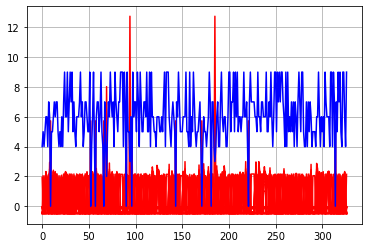

In [24]:
plt.grid(True)
plt.plot(X_test_scaled, color = "red")
plt.plot(encoded_y_test, color = "blue")
plt.show()

No handles with labels found to put in legend.


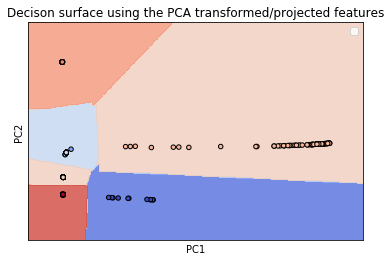

In [25]:
from sklearn.svm import SVC
import numpy as np

from sklearn import svm
from sklearn.decomposition import PCA

X = (X_test_scaled)
y = (encoded_y_test)

pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(Xreduced, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
ax.legend()
plt.show()

In [26]:
from mpl_toolkits.mplot3d import Axes3D

X = (X_test_scaled[:, :3])
Y = (encoded_y_test)
#X = iris.data[:, :3]  # we only take the first three features.
#Y = iris.target

#make it binary classification problem
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

model = svm.SVC(kernel='linear')
clf = model.fit(X, Y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()

ValueError: The number of classes has to be greater than one; got 1 class

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# fit the data and make predictions
model.fit(X_train_scaled, encoded_y_train)
predictions = model.predict(X_test_scaled)
predictions

/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([4, 5, 4, 5, 6, 6, 4, 7, 6, 0, 5, 5, 6, 7, 6, 7, 7, 5, 4, 5, 4, 6,
       4, 7, 9, 6, 6, 9, 5, 7, 9, 7, 9, 5, 7, 5, 4, 6, 6, 6, 7, 9, 6, 7,
       4, 5, 7, 7, 6, 5, 5, 9, 0, 4, 6, 9, 4, 0, 6, 7, 7, 5, 6, 9, 5, 4,
       0, 7, 4, 2, 5, 7, 6, 9, 7, 6, 7, 4, 9, 7, 6, 5, 7, 7, 9, 9, 9, 4,
       9, 7, 0, 9, 5, 5, 3, 6, 0, 9, 6, 7, 7, 5, 9, 7, 4, 9, 7, 5, 5, 7,
       7, 6, 9, 5, 5, 9, 4, 9, 6, 6, 5, 5, 4, 6, 6, 6, 5, 5, 6, 5, 7, 9,
       4, 9, 9, 9, 6, 5, 4, 6, 7, 6, 5, 0, 7, 6, 9, 7, 5, 5, 5, 6, 6, 6,
       9, 5, 5, 4, 9, 4, 6, 5, 9, 7, 5, 4, 5, 5, 6, 7, 4, 0, 4, 6, 5, 5,
       4, 5, 6, 9, 7, 0, 7, 7, 4, 3, 4, 6, 7, 4, 4, 7, 9, 6, 5, 6, 6, 4,
       4, 6, 9, 9, 5, 7, 7, 9, 5, 9, 6, 9, 5, 6, 6, 5, 6, 6, 9, 6, 6, 7,
       4, 0, 7, 9, 7, 7, 7, 7, 6, 6, 5, 9, 6, 6, 5, 7, 7, 6, 6, 6, 9, 5,
       5, 7, 6, 9, 6, 4, 6, 9, 9, 5, 9, 7, 9, 7, 9, 9, 7, 6, 4, 9, 4, 9,
       5, 6, 5, 7, 5, 7, 4, 7, 6, 4, 7, 9, 7, 5, 9, 9, 5, 4, 4, 7, 4, 7,
       5, 7, 6, 4, 5, 5, 5, 4, 6, 6, 9, 6, 4, 6, 5,

In [29]:
print(f"Training Data Score: {model.score(X_train_scaled, encoded_y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, encoded_y_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0


In [30]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        64
           6       1.00      1.00      1.00        74
           7       1.00      1.00      1.00        65
           9       1.00      1.00      1.00        62

    accuracy                           1.00       327
   macro avg       1.00      1.00      1.00       327
weighted avg       1.00      1.00      1.00       327



In [31]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [10, 50, 100],
             'max_iter':[200, 500, 1000]}
grid = GridSearchCV(model,param_grid, verbose=3)

In [32]:
# Train the model with GridSearch
grid.fit(X_train_scaled, encoded_y_train)

/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:46

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=10, max_iter=200 ..............................................
[CV] .................. C=10, max_iter=200, score=0.997, total=   0.0s
[CV] C=10, max_iter=200 ..............................................
[CV] .................. C=10, max_iter=200, score=1.000, total=   0.0s
[CV] C=10, max_iter=200 ..............................................
[CV] .................. C=10, max_iter=200, score=1.000, total=   0.0s
[CV] C=10, max_iter=500 ..............................................
[CV] .................. C=10, max_iter=500, score=0.997, total=   0.0s
[CV] C=10, max_iter=500 ..............................................
[CV] .................. C=10, max_iter=500, score=1.000, total=   0.0s
[CV] C=10, max_iter=500 ..............................................
[CV] .................. C=10, max_iter=500, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000 .............................................
[CV] ............

/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/U

[CV] .................. C=50, max_iter=200, score=1.000, total=   0.0s
[CV] C=50, max_iter=500 ..............................................
[CV] .................. C=50, max_iter=500, score=0.997, total=   0.1s
[CV] C=50, max_iter=500 ..............................................
[CV] .................. C=50, max_iter=500, score=1.000, total=   0.0s
[CV] C=50, max_iter=500 ..............................................
[CV] .................. C=50, max_iter=500, score=1.000, total=   0.0s
[CV] C=50, max_iter=1000 .............................................
[CV] ................. C=50, max_iter=1000, score=0.997, total=   0.0s
[CV] C=50, max_iter=1000 .............................................


/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/U

[CV] ................. C=50, max_iter=1000, score=1.000, total=   0.0s
[CV] C=50, max_iter=1000 .............................................
[CV] ................. C=50, max_iter=1000, score=1.000, total=   0.1s
[CV] C=100, max_iter=200 .............................................
[CV] ................. C=100, max_iter=200, score=0.997, total=   0.1s
[CV] C=100, max_iter=200 .............................................


/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/U

[CV] ................. C=100, max_iter=200, score=1.000, total=   0.0s
[CV] C=100, max_iter=200 .............................................
[CV] ................. C=100, max_iter=200, score=1.000, total=   0.1s
[CV] C=100, max_iter=500 .............................................
[CV] ................. C=100, max_iter=500, score=0.997, total=   0.0s
[CV] C=100, max_iter=500 .............................................


/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/U

[CV] ................. C=100, max_iter=500, score=1.000, total=   0.0s
[CV] C=100, max_iter=500 .............................................
[CV] ................. C=100, max_iter=500, score=1.000, total=   0.1s
[CV] C=100, max_iter=1000 ............................................
[CV] ................ C=100, max_iter=1000, score=0.997, total=   0.1s
[CV] C=100, max_iter=1000 ............................................


/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/U

[CV] ................ C=100, max_iter=1000, score=1.000, total=   0.1s
[CV] C=100, max_iter=1000 ............................................
[CV] ................ C=100, max_iter=1000, score=1.000, total=   0.1s


/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.4s finished
/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/matthouser/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_clas

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [10, 50, 100], 'max_iter': [200, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [33]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'max_iter': 200}
0.9989806320081549
